Module 5 Assignment: Sean McLean

In [3]:
#Test classification dataset that creates and summarizes the dataset:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [4]:
#Evaluate a Logistic Regression Model using K-fold Cross-Validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.868 (0.032)


n_splits=3: 0.867 (0.010)
n_splits=4: 0.863 (0.013)
n_splits=5: 0.865 (0.016)
n_splits=6: 0.866 (0.032)
n_splits=7: 0.867 (0.019)
n_splits=8: 0.866 (0.029)
n_splits=9: 0.865 (0.030)
n_splits=10: 0.868 (0.032)*
n_splits=11: 0.868 (0.048)*
n_splits=12: 0.866 (0.055)
n_splits=13: 0.862 (0.046)
n_splits=14: 0.867 (0.044)
n_splits=15: 0.865 (0.053)

Using the article's advice the default splits was set at 10 which resulted in an accuracy score of 0.868 with a standard deviation of 0.032. The amount of splits was then adjusted in the range of 3 to 15 to see if that would help improve the accuracy with each result shown above. The closest number was 11 splits which was nearly identical to the default number with a slightly higher standard deviation. Overall, adjusting the splits did not improve the accuracy score.

One way to improve the accuracy from the previous question: Feature Scaling

In [5]:
#Reference: https://stackoverflow.com/questions/51459406/how-to-apply-standardscaler-in-pipeline-in-scikit-learn-sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# Prepare cross-validation procedure
cv = KFold(n_splits=7, random_state=1, shuffle=True)

# Create pipeline that includes feature scaling and logistic regression
# Feature scaling standardizes data
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Evaluate model with cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.868 (0.020)


n_splits=3: 0.867 (0.010)
n_splits=4: 0.862 (0.014)
n_splits=5: 0.865 (0.016)
n_splits=6: 0.865 (0.016)
n_splits=7: 0.868 (0.020)*
n_splits=8: 0.868 (0.020)*
n_splits=9: 0.865 (0.030)
n_splits=10: 0.866 (0.034)
n_splits=11: 0.867 (0.048)
n_splits=12: 0.864 (0.052)
n_splits=13: 0.864 (0.052)
n_splits=14: 0.866 (0.045)
n_splits=15: 0.867 (0.051)

Scaling features are applied to see if importing StandardScaler and Pipeline will help standardize the features of the dataset. After using the same test classification dataset and default number at 10 splits, the accuracy is just a bit lower than the score from the previous logisitic regression model.Further adjustment of the splits show a slight increase in accuracy and standard deviation score when lowered to 7 or 8 splits. This shuffle makes a small difference in accuracy as 0.868 with a std of 0.020 is slightly better than the highest accuracy score from the logistic regression model. Overall, this alternative process helped improve the accuracy score even if it was minimal.

Reference: https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/

In [6]:
#Evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.867 (0.031)


n_splits=10, n_repeats=3: 0.867 (0.031)*
n_splits=10, n_repeats=4: 0.867 (0.038)
n_splits=10, n_repeats=5: 0.866 (0.035)
n_splits=10, n_repeats=6: 0.866 (0.034)
n_splits=10, n_repeats=7: 0.865 (0.033)
n_splits=10, n_repeats=8: 0.865 (0.033)
n_splits=10, n_repeats=9: 0.866 (0.032)
n_splits=10, n_repeats=10: 0.866 (0.032)
n_splits=10, n_repeats=11: 0.865 (0.032)
n_splits=10, n_repeats=12: 0.865 (0.032)
n_splits=10, n_repeats=13: 0.865 (0.032)
n_splits=10, n_repeats=14: 0.865 (0.032)
n_splits=10, n_repeats=15: 0.865 (0.031)

The k-fold cross validation repeats were set at 10 splits with 3 repeats as the deafult as requested in the article. The result is an accuracy score of 0.867 with a standard deviation of 0.031. The number of repeats in the cross validation were revised to see if the accruacy value could be improved. As the number of repeats increased with the default number of splits staying at 10, the accuracy scores decreased slightly and began to level out and stay the same after 11 repeats as shown in the results above. From these adjustments it concludes that the default splits and runs provided the highest accuracy values overall.

One way to improve the accuracy from the previous question: Hyperparameter Tuning

In [7]:
#Reference: https://stackoverflow.com/questions/60071585/hyperparameter-tuning
# Import necessary libraries
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# Prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define the model
model = LogisticRegression()

# The 'C' parameter controls strength of regularization
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to search for best 'C' value
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# Fit grid search to find the optimal hyperparameters
grid_search.fit(X, y)

# Get best model and evaluate accuracy
best_model = grid_search.best_estimator_
best_scores = cross_val_score(best_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Report performance of best model
print(f"Best 'C' value: {grid_search.best_params_['C']}")
print('Improved Accuracy: %.3f (%.3f)' % (mean(best_scores), std(best_scores)))

Best 'C' value: 0.01
Improved Accuracy: 0.868 (0.032)


n_splits=10, n_repeats=3: 0.01, 0.868 (0.032)*
n_splits=10, n_repeats=4: 100, 0.867 (0.037)
n_splits=10, n_repeats=5: 0.01, 0.867 (0.035)
n_splits=10, n_repeats=6: 0.01, 0.867 (0.034)
n_splits=10, n_repeats=7: 0.01, 0.867 (0.034)
n_splits=10, n_repeats=8: 0.01, 0.867 (0.034)
n_splits=10, n_repeats=9: 0.01, 0.867 (0.034)
n_splits=10, n_repeats=10: 0.01, 0.867 (0.034)
n_splits=10, n_repeats=11: 0.01, 0.867 (0.034)
n_splits=10, n_repeats=12: 0.01, 0.867 (0.034)
n_splits=10, n_repeats=13: 0.01, 0.867 (0.034)
n_splits=10, n_repeats=14: 0.01, 0.867 (0.034)
n_splits=10, n_repeats=15: 0.01, 0.867 (0.033)

To improve the accuracy of a logistic regression model, hyperparameter tuning was implemented as an alernative that can optimize the regularization strength using grid search with cross-validation. This approach systematically tests multiple values for C to find the best-performing configuration while repeated k-fold cross-validation enhances robustness by reducing variability in accuracy estimates.
After starting with the default numbers of 10 splits and three repeats, the number of repeats was increased to try to improve the accuracy. Raising the amount of repeats to four showed a C value of 100 that suggests weaker regularization and could potentially cause overfitting of the data. After this the results with each increase in repeats stayed the same at 0.01 for the best C value and an accuracy of 0.867. The default numbers with the hypertuning of the parameters has the best metrics and does improve the accuracy score slightly from the previous logistic regression model.

Reference: https://www.geeksforgeeks.org/hyperparameter-tuning/

>1 mean=0.8680 se=0.011
>2 mean=0.8675 se=0.008
>3 mean=0.8673 se=0.006
>4 mean=0.8670 se=0.006
>5 mean=0.8658 se=0.005
>6 mean=0.8655 se=0.004
>7 mean=0.8651 se=0.004
>8 mean=0.8651 se=0.004
>9 mean=0.8656 se=0.003
>10 mean=0.8658 se=0.003
>11 mean=0.8655 se=0.003
>12 mean=0.8654 se=0.003
>13 mean=0.8652 se=0.003
>14 mean=0.8651 se=0.003
>15 mean=0.8653 se=0.003


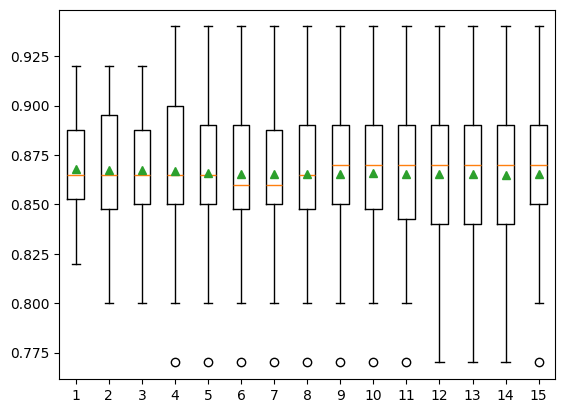

In [8]:
#Compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

One way to improve the accuracy from the previous question: Data Scaling

>1 mean=0.8660 se=0.011
>2 mean=0.8665 se=0.008
>3 mean=0.8670 se=0.006
>4 mean=0.8665 se=0.006
>5 mean=0.8652 se=0.005
>6 mean=0.8650 se=0.005
>7 mean=0.8649 se=0.004
>8 mean=0.8650 se=0.004
>9 mean=0.8656 se=0.003
>10 mean=0.8657 se=0.003
>11 mean=0.8655 se=0.003
>12 mean=0.8653 se=0.003
>13 mean=0.8652 se=0.003
>14 mean=0.8651 se=0.003
>15 mean=0.8653 se=0.003


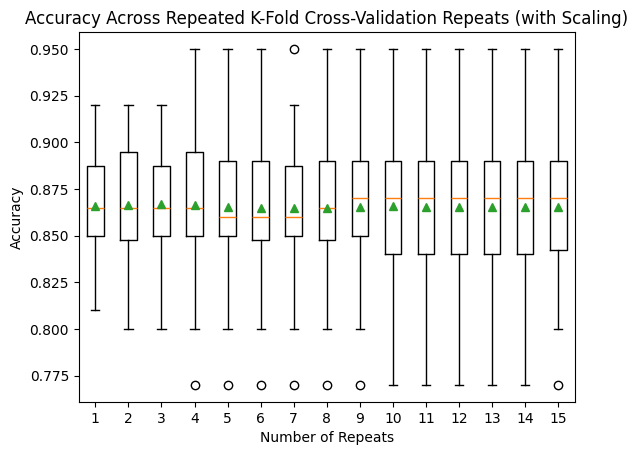

In [9]:
#Reference: https://stackoverflow.com/questions/51459406/how-to-apply-standardscaler-in-pipeline-in-scikit-learn-sklearn
# Import necessary libraries
from scipy.stats import sem
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# Evaluate model with a given number of repeats
def evaluate_model(X, y, repeats):
    """
    Evaluates the logistic regression model using repeated k-fold cross-validation with scaling.
    Parameters:
        X: Input features
        y: Target variable
        repeats: Number of repeats for cross-validation
    Returns:
        scores: List of accuracy scores for the model
    """
    # Prepare cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)

    # Create pipeline with data scaling and logistic regression
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('logistic', LogisticRegression(random_state=1))
    ])

    # Evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# Create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# Configurations to test
repeats = range(1, 16)
results = list()

for r in repeats:
    # Evaluate using a given number of repeats
    scores = evaluate_model(X, y, r)
    # Summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # Store
    results.append(scores)

# Plot results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.title("Accuracy Across Repeated K-Fold Cross-Validation Repeats (with Scaling)")
pyplot.xlabel("Number of Repeats")
pyplot.ylabel("Accuracy")
pyplot.show()

I tried using scaling again with the changes integrating StandardScaler into a pipeline to standardize features and ensuring they have a mean of 0 and a standard deviation of 1. This approach improves optimization and consistency during cross-validation, leading to more stable and accurate logistic regression performance when feature scales vary.
A box and whisker plot is then used to display the distribution of scores for each number of repeats. The orange line that represents the median, crosses through the green triangle of eight repeats which shows the arithmetic mean which is 0.8650 at eight repeats. This overlap suggests that the mean accurately reflects the central tendency and that selecting eight repeats for the test harness and algorithm seems to be an effective choice. And compared to the logistic regression model previously, the standard error of 0.004 is smaller using the scaling, indicating that it might be more preferable to use eight repeats instead of five repeats for accuracy stability.

In conclusion, these alternative approaches show small improvements when compared to the logistic regression model. The accuracy of the model, however, was all ready pretty high and therefore the small changes might not be enough to choose one over the other. It will depend on what problem is trying to be solved and whether those small improvements will make enough of an impact and difference.